In [ ]:
import argparse
import gym
import numpy as np
import matplotlib.pyplot as plot
from stable_baselines.deepq import DQN

In [ ]:
def raster(behaviour, title):
    # behaviour is var_log with vector entries [action, rew, obs, float(done), tn]
    greedy_log = behaviour
    
    no_trials = greedy_log[-1][4] # picks trial number of last trial (number of trials)
    all_trial_stopping = [] # initialise empty list

    # changes structure so behaviour is organised by trial
    for trial in range(no_trials+1):    
        trial_log = np.delete(greedy_log, np.where(np.array(greedy_log)[:, 4] != trial), 0)    # can use this for raster plot
        v = [i[1] for i in trial_log[:,2]] # vector of states per time step in trial (velocity)
        idx = np.array(np.array(v)==0.0) # vector of boolean per time step showing v = 0
        pos = np.array([i[0] for i in trial_log[:,2]]) # vector of positions for which v = 0
        all_trial_stopping.append(pos[idx]) # appendable list of positions for which v = 0 

        # Draw a spike raster plot
    plot.eventplot(all_trial_stopping, linelengths=1, linewidths=5, color='k')     
    # Provide the title for the spike raster plot
    plot.title(title)
    plot.xlabel('Track Position')
    plot.ylabel('Trial')
    
    x = [0.4, 0.6, 0.6, 0.4]     # setting fill area for reward zone
    y = [0, 0, no_trials, no_trials]
    plot.fill(x,y, color="k", alpha=0.2)
    
    plot.ylim([0,no_trials])   
    plot.xlim([-0.6, 0.7])  # track limits 
    plot.show()
        

In [ ]:
"""
Train and save the DQN model, for the mountain car problem

:param args: (ArgumentParser) the input arguments
"""
env = gym.make("MountainCar-v0")

# using layer norm policy here is important for parameter space noise!
model = DQN(
    policy="LnMlpPolicy",
    env=env,
    learning_rate=1e-3,
    buffer_size=50000,
    exploration_fraction=0.1,
    exploration_final_eps=0.1,
    param_noise=True,
    prioritized_replay=True,
    policy_kwargs=dict(layers=[64])
)

greedy = []
for i in range(50):
    timejump = 10000
    model.learn(total_timesteps=timejump)
    # run greedy policy evaluation and var log this
    # policy is considered for 5000 timesteps
    greedy_log = []
    t = 100  # number of trials for greedy policy eval
    tn = 0
    while (t>0):
        obs, done = env.reset(), False
        episode_rew = 0
    
        while not done:
            env.render()
            # Epsilon-greedy
            if np.random.random() < 0.02:
                action = env.action_space.sample()
            else:
                action, _ = model.predict(obs, deterministic=True)
            obs, rew, done, _ = env.step(action)
            
            # store log for greedy
            greedy_log.append([action, rew, obs, float(done), tn])
            episode_rew += rew
            
        print("Episode reward", episode_rew)
        t-=1
        tn+=1
   
    greedy.append(greedy_log)
    
    Greedy_title = "Greedy policy raster at " + str((i+1)*timejump) + "timesteps"
    raster(greedy_log, Greedy_title)

behaviour = model.var_log
behaviour_title = "Exploration policy raster at " + str((i+1)*timejump) + "timesteps"
raster(behaviour, behaviour_title)

print("Saving model to mountaincar_model.pkl")
model.save("mountaincar_model.pkl")


In [ ]:
example_model = DQN.load("mountaincar_model.pkl", env)
while True:
    obs, done = env.reset(), False
    episode_rew = 0
    while not done:
        env.render()
        # Epsilon-greedy
        if np.random.random() < 0.02:
            action = env.action_space.sample()
        else:
            action, _ = example_model.predict(obs, deterministic=True)
        obs, rew, done, _ = env.step(action)
        episode_rew += rew
    print("Episode reward", episode_rew)

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


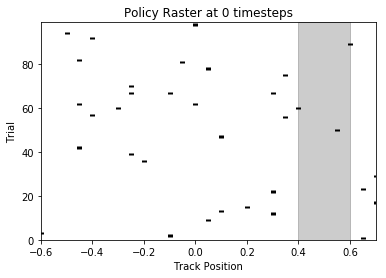

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

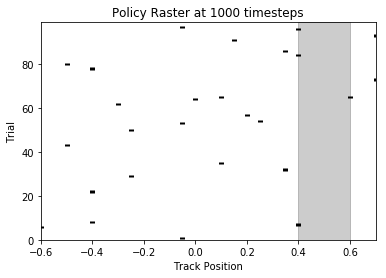

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


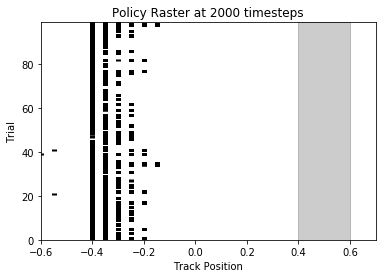

rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 53
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 55
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion 

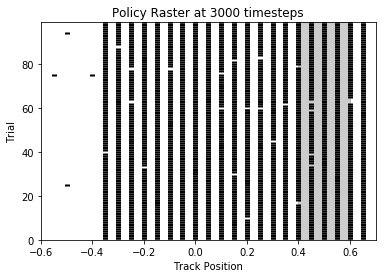

rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 55
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 52
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 55
rewarded and the postion = 0.44999999999999996
Episode reward 55
rewarded and the postion = 0.44999999999999996
Episode reward 53
rewarded and the postion = 0.44999999999999996
Episode reward 53
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 53
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion = 0.44999999999999996
Episode reward 54
rewarded and the postion 

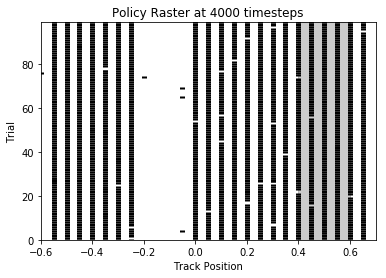

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 64
rewarded and the postion = 0.44999999999999996
Episode reward 64
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 64
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 64
rewarded and the postion = 0.44999999999999

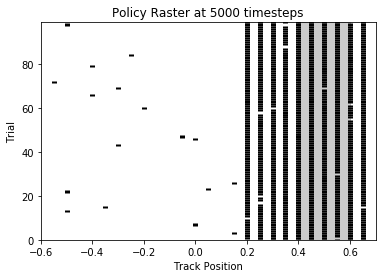

rewarded and the postion = 0.49999999999999994
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999

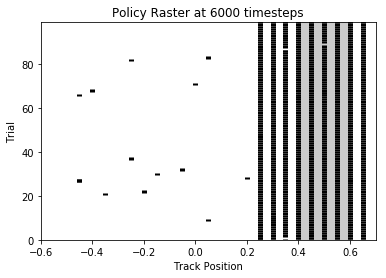

rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 68
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 68
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 68
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion 

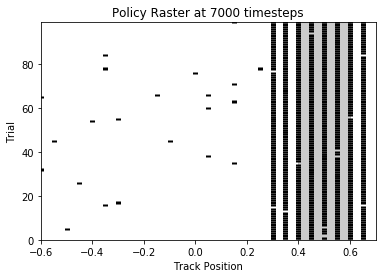

rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 65
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 66
rewarded and the postion = 0.44999999999999996
Episode reward 67
rewarded and the postion 

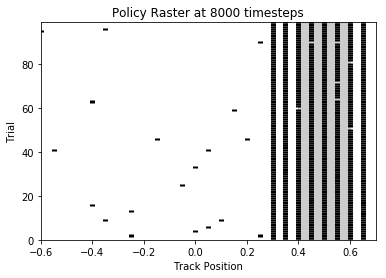

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -83
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.

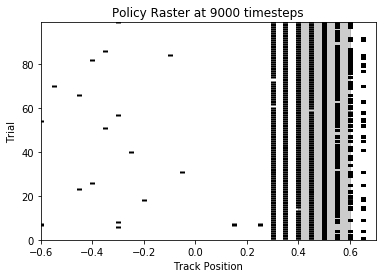

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode rew

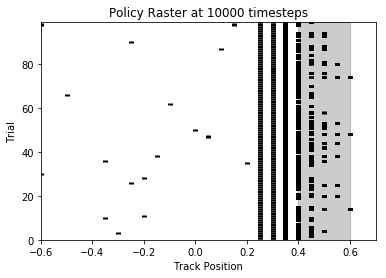

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewa

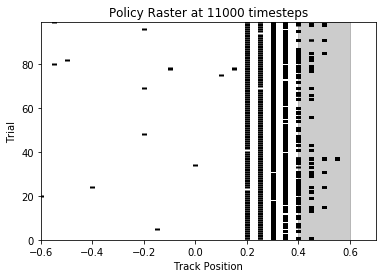

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.5499999999999999
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode re

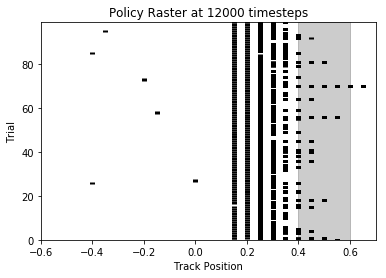

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.5499999999999999
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
r

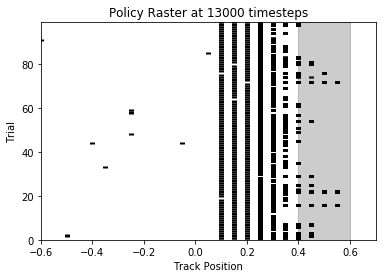

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward

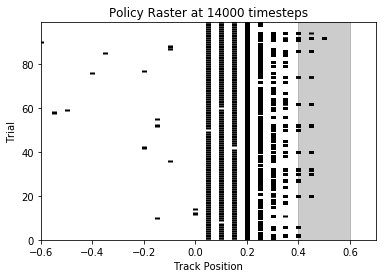

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode

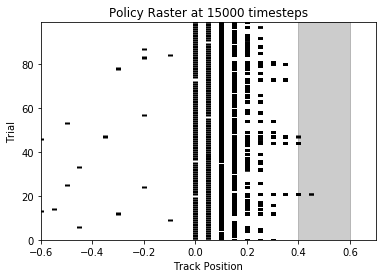

rewarded and the postion = 0.49999999999999994
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.49999999999999994
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewa

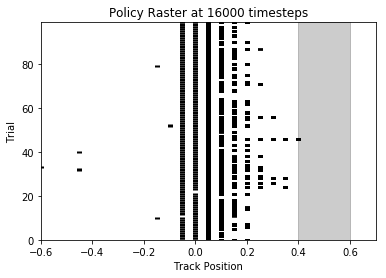

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.5499999999999999
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode

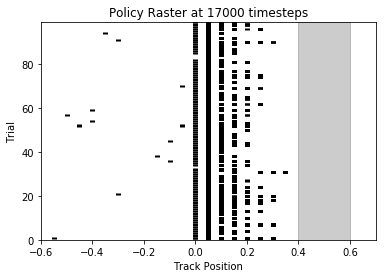

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

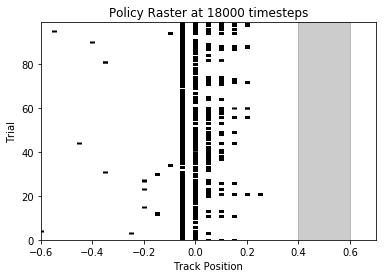

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode 

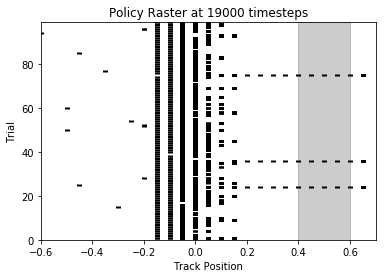

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -73
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward 46
rewarded and the postion = 0.44999999999999996
Episode reward -37
rewarded and the postion = 0.44999999999999996
Episode reward -80
rewarded and the postion = 0.44999999999999996
Episode reward -73
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward 44
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward 23
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward 32
rewarded and 

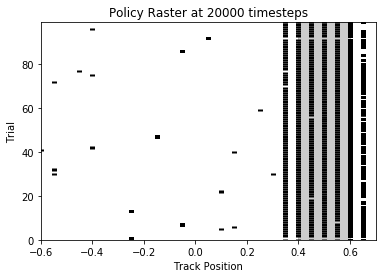

rewarded and the postion = 0.49999999999999994
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.49999999999999994
Episode reward 72
rewarded and the postion = 0.44999999999999996
Episode reward 69
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 69
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward

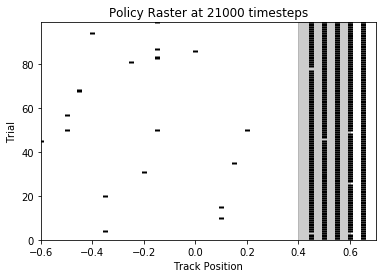

rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -18
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -69
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -49
rewarded and the postion = 0.44999999999999996
Episode reward -57
rewarded and the postion = 0.44999999999999996
Episode reward -32
rewarded and the postion = 0.44999999999999996
Episode reward 42
rewarded and the postion = 0.44999999999999996
Episode reward -68
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999

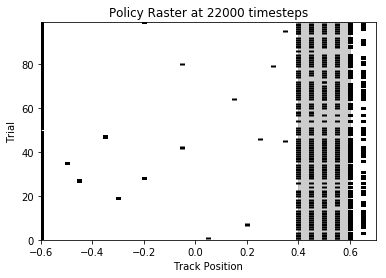

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


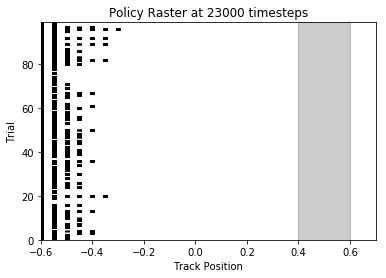

rewarded and the postion = 0.49999999999999994
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 69
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward 70
rewarded and the postion = 0.44999999999999996
Episode reward

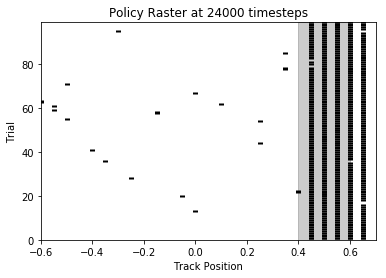

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded

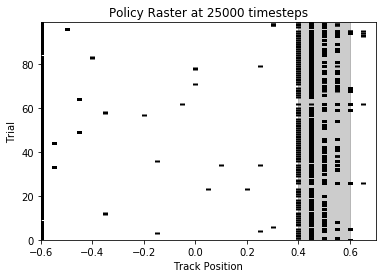

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -88
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward 

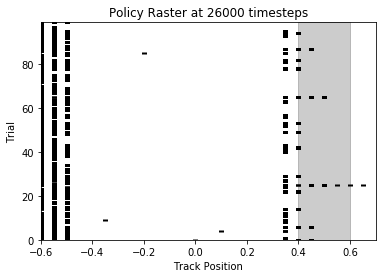

Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -56
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
re

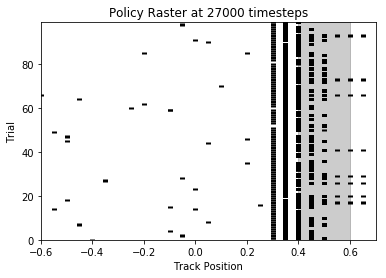

Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -95
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -66
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -32
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.449

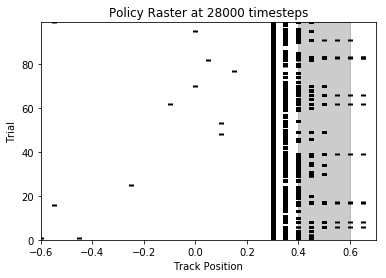

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -93
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -82
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -45
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode re

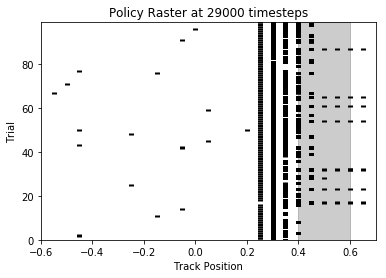

Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -92
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -96
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -74
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996

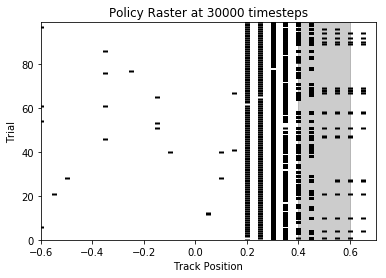

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward

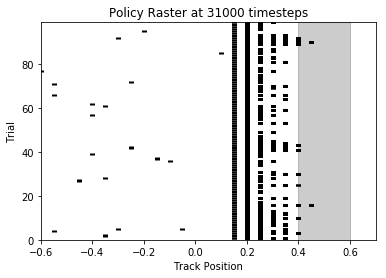

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


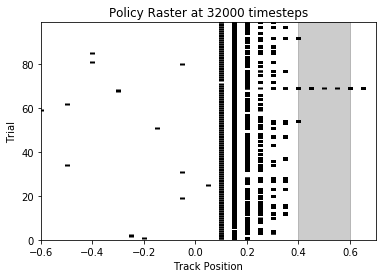

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


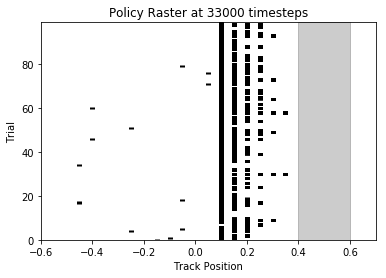

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


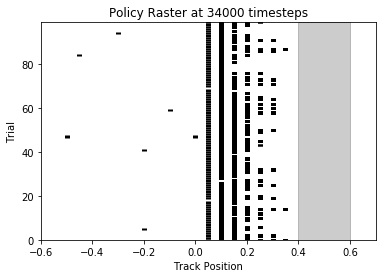

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


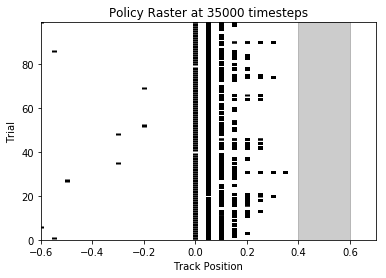

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


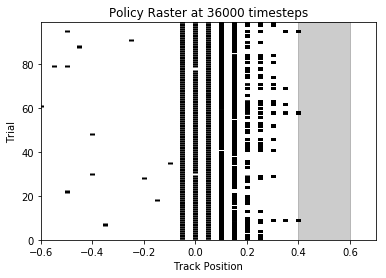

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


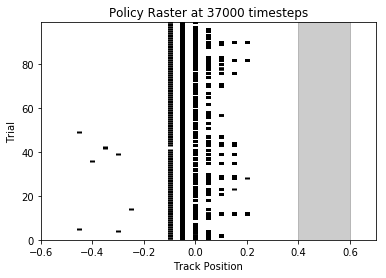

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


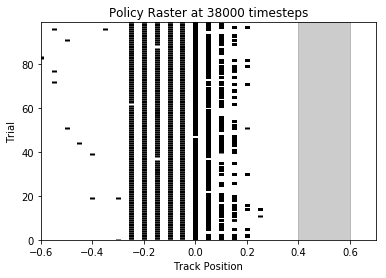

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


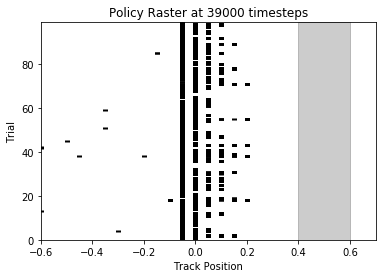

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

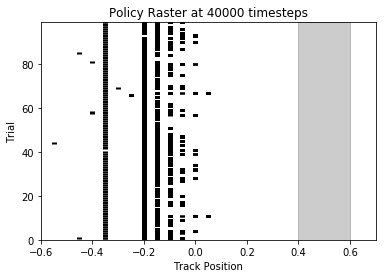

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


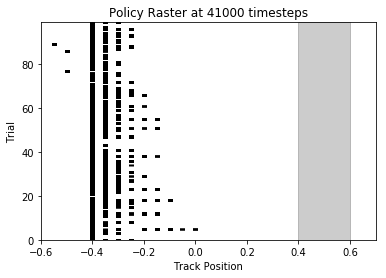

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


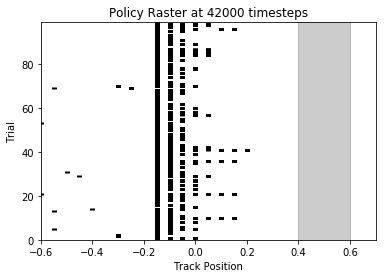

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


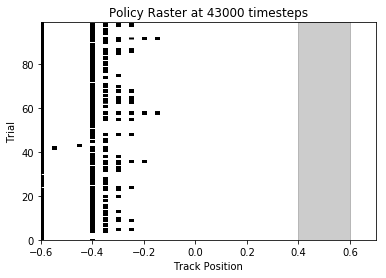

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

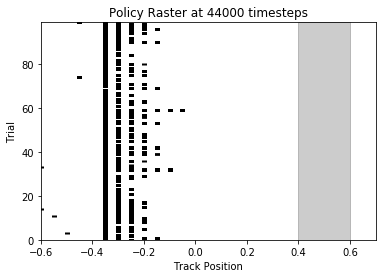

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


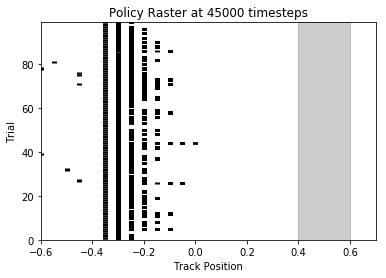

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


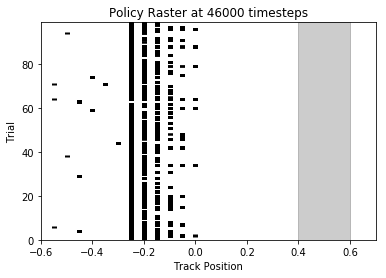

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


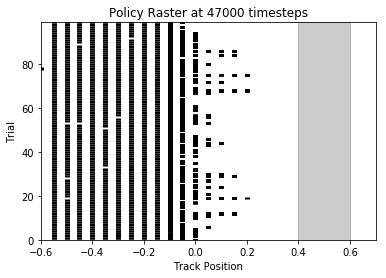

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


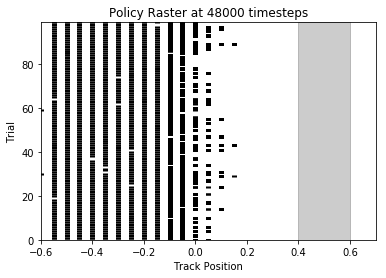

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


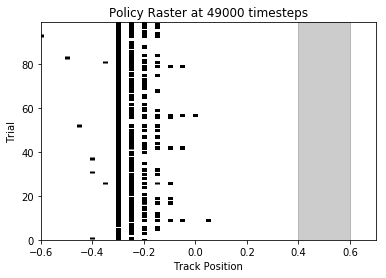

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

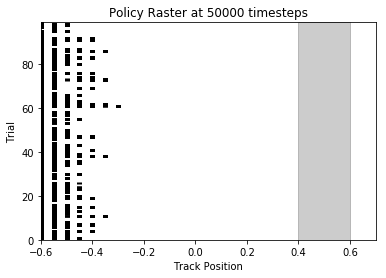

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


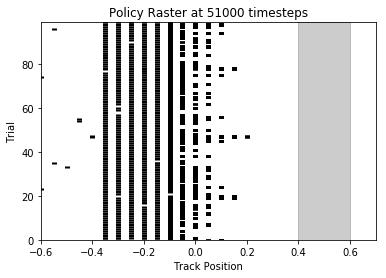

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


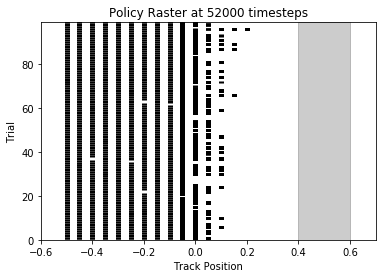

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.49999999999999994
Episode reward -47
rewarded and the postion = 0.44999999999999996
Episode reward -97
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward 41
rewarded and the postion = 0.44999999999999996
Episode reward -2
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.49999999999999994
Episode reward -99
rewarded and the postion = 0.44999999999999996
Epi

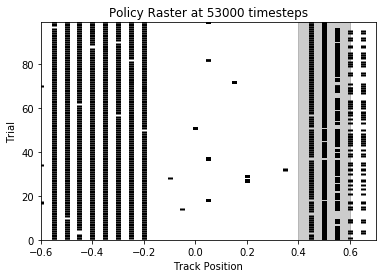

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

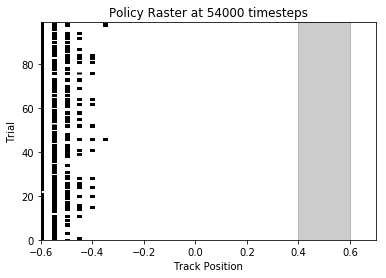

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


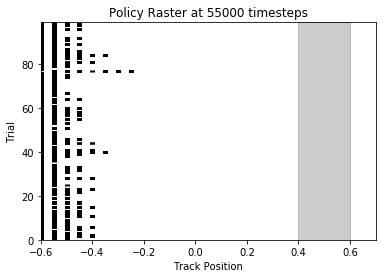

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


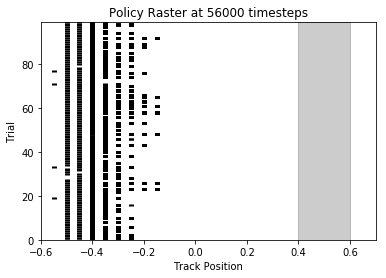

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


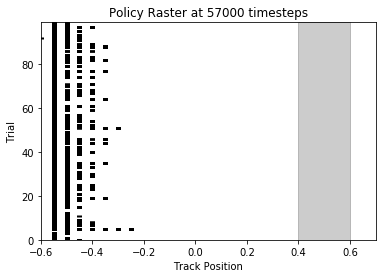

rewarded and the postion = 0.49999999999999994
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

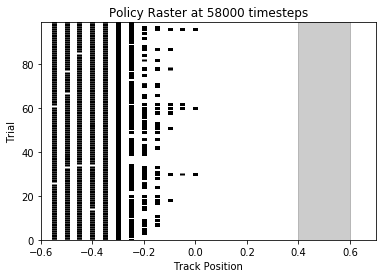

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


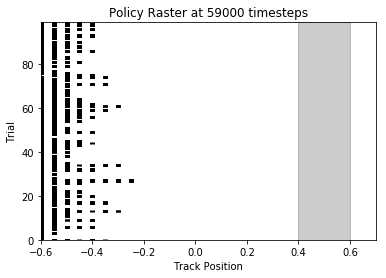

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


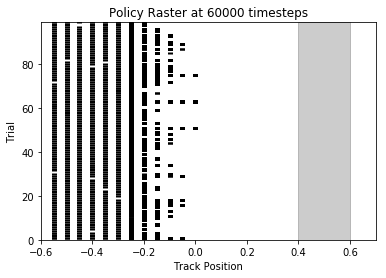

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


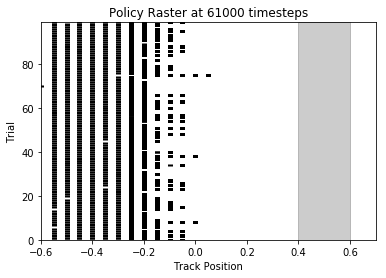

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

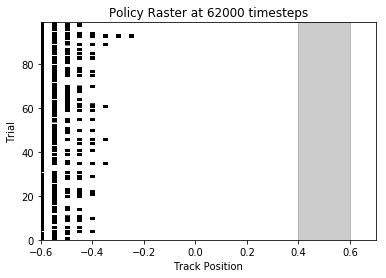

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.49999999999999994
rewarded and the postion = 0.49999999999999994
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200

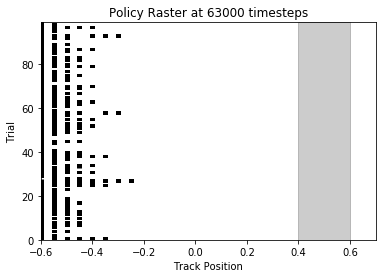

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rewar

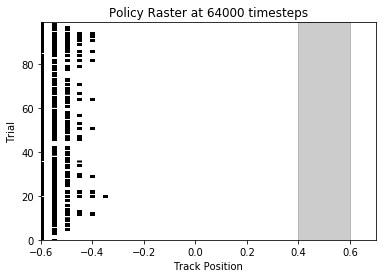

rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward -94
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -31
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward 16
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -95
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -61
rewarded and the postion = 0.44999999999999996
Episode reward -55
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward 21
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -79
rewarded and the postion = 0.44999999999999996
Episode reward -84
rewarded and the postion = 0.44999999999999996
Episode reward -34
Episode reward -200
rewarded 

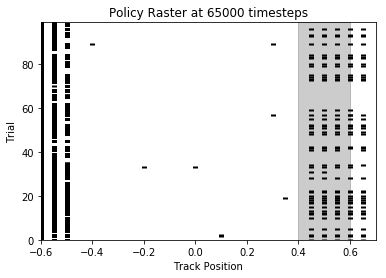

rewarded and the postion = 0.44999999999999996
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -70
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -36
rewarded and the postion = 0.44999999999999996
Episode reward -63
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -95
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -82
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -66
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode rew

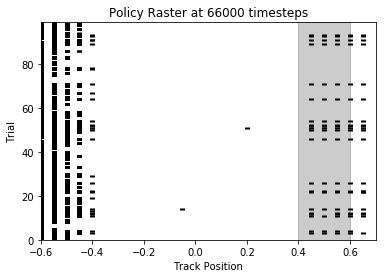

rewarded and the postion = 0.49999999999999994
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
rewarded and the postion = 0.44999999999999996
Episode reward 8
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward 47
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -2
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -6
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -48
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -12
rewarded and the postion = 0.44999999999999996
Episode reward 13
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward 8
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward 34
rewarded and t

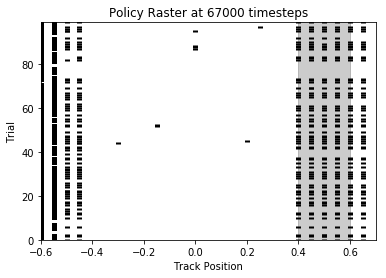

rewarded and the postion = 0.44999999999999996
Episode reward -48
rewarded and the postion = 0.44999999999999996
Episode reward 19
rewarded and the postion = 0.44999999999999996
Episode reward -15
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward 9
rewarded and the postion = 0.44999999999999996
Episode reward -48
rewarded and the postion = 0.44999999999999996
Episode reward 49
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -75
rewarded and the postion = 0.44999999999999996
Episode reward -14
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999

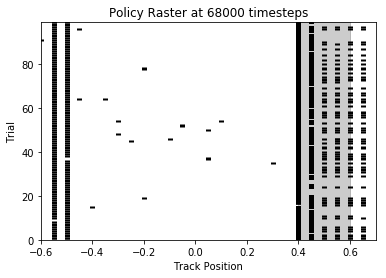

Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the

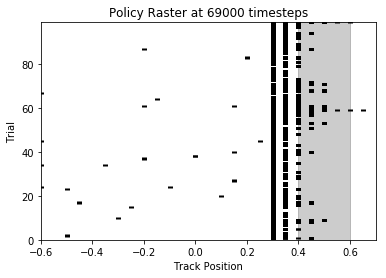

rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -49
rewarded and the postion = 0.44999999999999996
Episode reward 12
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -81
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44

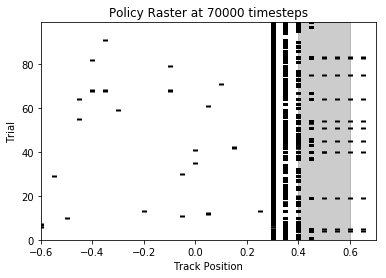

Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -70
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -52
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996

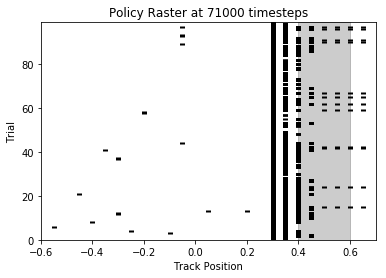

rewarded and the postion = 0.44999999999999996
Episode reward -40
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -5
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode

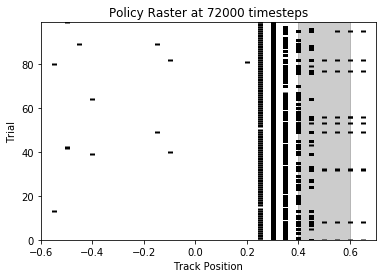

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -76
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -43
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -20

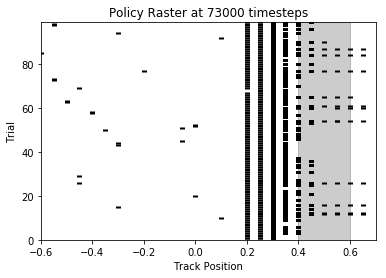

rewarded and the postion = 0.44999999999999996
Episode reward -71
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -53
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -99
rewarded and the postion = 0.44999999999999996
Episode reward -95
rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episod

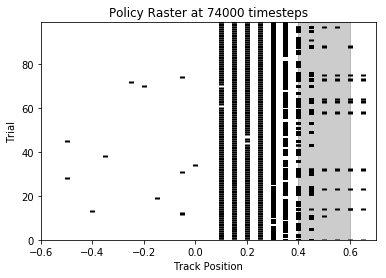

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


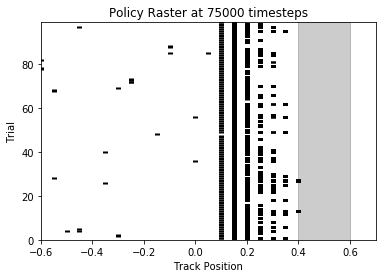

rewarded and the postion = 0.44999999999999996
Episode reward -99
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward

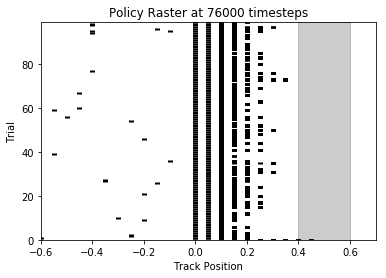

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


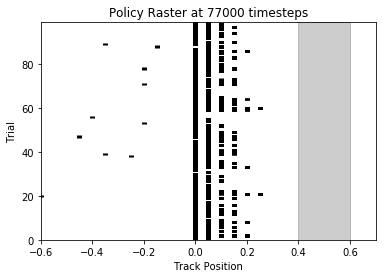

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


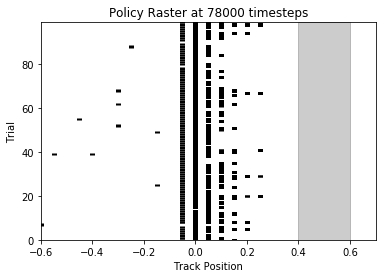

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


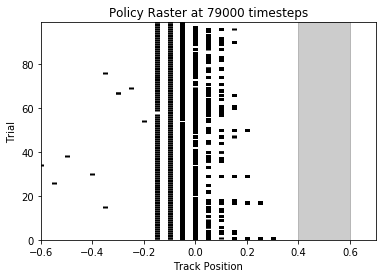

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


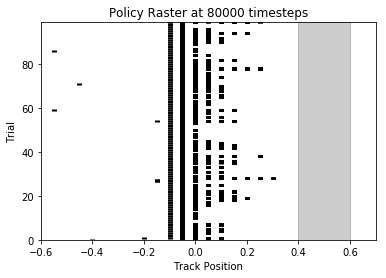

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


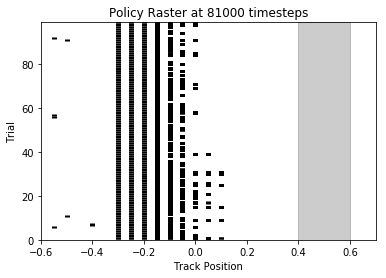

Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200
Episode reward -200


KeyboardInterrupt: 

In [2]:

# this is for learning and evaluating within the learn function


"""
Train and save the DQN model, for the mountain car problem

:param args: (ArgumentParser) the input arguments
"""
env = gym.make("MountainCar-v0")

# using layer norm policy here is important for parameter space noise!
model = DQN(
    policy="LnMlpPolicy",
    env=env,
    learning_rate=1e-3,
    buffer_size=50000,
    exploration_fraction=0.1,
    exploration_final_eps=0.1,
    param_noise=True,
    prioritized_replay=True,
    action_error_std=0,
    policy_kwargs=dict(layers=[64])
)

training_steps = 10000
model.learn(total_timesteps=training_steps)
behaviour = model.var_log
behaviour_title = "Exploration policy raster at " + str(training_steps) + "timesteps"
raster(behaviour, behaviour_title)

print("Saving model to mountaincar_model.pkl")
model.save("mountaincar_model.pkl")
